# Problem
Can the sale amount for properties in Conneticut be predicted?

Also, where are the best places to buy? Best places to sell? places with the best/worst sale ratios?

Through understanding this dataset, real estate buyers and sellers in Conneticut can make smart sales and purchases.

# Data Collection
Data sourced from data.gov

https://catalog.data.gov/dataset/real-estate-sales-2001-2018

In [1]:
import pandas as pd
df = pd.read_csv(
    'Real_Estate_Sales_2001-2023_GL.csv',
    dtype = {
        'Serial Number':'int64',
        'List Year':'int64',
        'Date Recorded':'string',
        'Town':'string',
        'Address':'string',
        'Assessed Value':'float64',
        'Sale Amount':'float64',
        #'Sales Ratio':'float64', This crashes since there is a value which cannot be converted to a float
        'Property Type':'string',
        'Residential Type':'string',
        'Non Use Code':'string',
        'Assessor Remarks':'string',
        'OPM remarks':'string',
        'Location':'string',
    },
)

C:\Users\jonah\AppData\Local\Temp\ipykernel_45596\893056073.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


# Data Understanding

In [2]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,<NA>,<NA>,<NA>,<NA>
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,<NA>,<NA>,<NA>,<NA>
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988)


In [3]:
df.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
1141717,230299,2023,04/19/2024,Southington,580-23 MERIDEN WATERBURY TPKE,26540.0,509900.0,0.0520,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION OVER 55 CONDO,<NA>,POINT (-72.86373 41.56032)
1141718,230568,2023,05/15/2024,West Haven,165 MILTON AVE,148050.0,400300.0,0.3698,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-72.97401 41.24665)
1141719,230217,2023,02/20/2024,Southington,242 LAZY LN,177340.0,334750.0,0.5297,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-72.88193 41.62094)
1141720,230097,2023,05/30/2024,Old Lyme,21 BUTTONBALL RD,8030.0,35000.0,0.2294,Vacant Land,<NA>,<NA>,DEVELOPERS LOT FOR NEW CONST,<NA>,POINT (-72.30557 41.29054)
1141721,230383,2023,06/06/2024,Shelton,512 ANTELOPE TRL,306460.0,659813.0,0.4645,Residential,Condo,25 - Other,89 33 512,"PER MLS CLOSING PRICE = $675,000",POINT (-73.13448 41.29345)


Sales Ratio = Assessed Value / Sale Amount

Low Sales Ratio (< 1): sold for less than assessed value -> bad for buyers, good for sellers

High sales Ratio (> 1): sold for more than assessed value -> good for buyers, bad for sellers

In [4]:
df.shape

(1141722, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  int64  
 2   Date Recorded     1141720 non-null  string 
 3   Town              1141722 non-null  string 
 4   Address           1141671 non-null  string 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   string 
 9   Residential Type  738804 non-null   string 
 10  Non Use Code      324807 non-null   string 
 11  Assessor Remarks  181090 non-null   string 
 12  OPM remarks       14346 non-null    string 
 13  Location          341241 non-null   string 
dtypes: float64(2), int64(2), object(1), string(9)
memory usage: 121.9+ MB


In [6]:
print('Null values:')
for col in df.columns:
    print(f'{col}: {df.shape[0]-df[col].count()}')

Null values:
Serial Number: 0
List Year: 0
Date Recorded: 2
Town: 0
Address: 51
Assessed Value: 0
Sale Amount: 0
Sales Ratio: 0
Property Type: 382446
Residential Type: 402918
Non Use Code: 816915
Assessor Remarks: 960632
OPM remarks: 1127376
Location: 800481


Values like Non Use Code, Assessor Remarks, OPM remarks, Location have over half of their entrances missing

In [7]:
for col in df.columns:
    print(f'{col} type: {pd.api.types.infer_dtype(df[col])}\n')
    #print(f'{df[col].apply(type).value_counts()}\n')

Serial Number type: integer

List Year type: integer

Date Recorded type: string

Town type: string

Address type: string

Assessed Value type: floating

Sale Amount type: floating

Sales Ratio type: mixed

Property Type type: string

Residential Type type: string

Non Use Code type: string

Assessor Remarks type: string

OPM remarks type: string

Location type: string



In [8]:
print(df['Date Recorded'].value_counts())

Date Recorded
07/01/2005    877
08/01/2005    859
07/01/2004    840
06/30/2005    828
09/30/2005    781
             ... 
01/15/2024      1
08/01/2009      1
07/03/2009      1
02/01/2009      1
09/01/2024      1
Name: count, Length: 7382, dtype: Int64


# Preprocessing

## Data Cleaning

Date Recorded seems to have some bad values. There many rows that have years listed in Date Recorded listed as 0023 and 2024. 

In [9]:
bad_dates = []
for i in range(1,13):
    month = ''
    if i < 10:
        month += '0'
    month += str(i)
    for j in range(1,32):
        day = ''
        if j < 10:
            day += '0'
        day += str(j)
        for k in range(23,25):
            bad_dates.append(f'{month}/{day}/00{k}')
            
count = 0
for bad_date in bad_dates:
    if df['Date Recorded'].isin([bad_date]).any():
        count += 1
        good_date = bad_date[:6] + '2' + bad_date[7:]
        df['Date Recorded'] = df['Date Recorded'].replace(bad_date,good_date)

df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
f'{count} bad dates'

'140 bad dates'

Sales Ratio should contain only floats, but df.info() shows it to have an object Dtype. Why is this?

In [10]:
df['Sales Ratio'].apply(type).value_counts()

Sales Ratio
<class 'float'>    1114112
<class 'str'>        27610
Name: count, dtype: int64

Since this column contains floats and strings, we need to convert all of the strings to floats

In [11]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        print(x)
        return False
sales_ratio_strings = df['Sales Ratio'][df['Sales Ratio'].apply(lambda x: not isinstance(x, float))]
sales_ratio_strings.apply(is_float).value_counts()

1,787.3333


Sales Ratio
True     27609
False        1
Name: count, dtype: int64

Of all the strings in df['Sales Ratio'], there is only one which cannot be converted to a float, so we can fix this individual datapoint.

Now every element in df['Sales Ratio'] is a float

We can also convert df['Date Recorded'] to datetimes.

In [12]:
df['Sales Ratio'] = df['Sales Ratio'].replace('1,787.3333','1787.3333')
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'])

df['Sales Ratio'].apply(type).value_counts()

Sales Ratio
<class 'float'>    1141722
Name: count, dtype: int64

In [13]:
df['Property Type'].value_counts()

Property Type
Single Family     401612
Residential       190628
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         9957
Commercial          7828
Four Family         2150
Apartments          1646
Industrial          1029
Public Utility        12
Name: count, dtype: Int64

In [14]:
df['Residential Type'].value_counts()

Residential Type
Single Family    535359
Condo            145436
Two Family        37173
Three Family      17670
Four Family        3166
Name: count, dtype: Int64

In [15]:
row = 500000
df[['Property Type','Residential Type']][row:row + 10]

,Property Type,Residential Type
500000,Two Family,Two Family
500001,Single Family,Single Family
500002,Three Family,Three Family
500003,<NA>,<NA>
500004,Single Family,Single Family
500005,<NA>,<NA>
500006,Single Family,Single Family
500007,Two Family,Two Family
500008,<NA>,<NA>
500009,Single Family,Single Family


It seems that some values in Residential Type have been copied to Property type. To keep these columns independent of eachother, the copied data will be replaced with 'Residential'

In [16]:
import numpy as np
for res_type in df['Residential Type'].unique():
    df.loc[df['Residential Type']==res_type,'Property Type'] = res_type
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014)
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,<NA>,<NA>,<NA>,<NA>
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,<NA>,<NA>,<NA>,<NA>
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988)


In [17]:
street = df['Address'].str.lstrip('0123456789 -#').str.rstrip('0123456789 -#')
df.insert(len(df.columns),'Street',street)

Remove invalid rows

In [18]:
df = df[df['Non Use Code'].isna()]

Fill missing data

In [19]:
df = df[df['Date Recorded'].notnull()]
for col in df.select_dtypes(include='string'):
    df[col] = df[col].fillna('Missing')

Now there are no more mixed types

In [20]:
df.describe()

,Serial Number,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio
count,8.169130e+05,816913.00000,816913,8.169130e+05,8.169130e+05,816913.000000
mean,6.053503e+05,2011.55259,2012-10-29 15:22:35.299769344,2.409089e+05,4.154740e+05,0.795156
min,2.100000e+01,2001.00000,1999-04-05 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,3.071900e+04,2004.00000,2005-09-23 00:00:00,9.555000e+04,1.720000e+05,0.472749
50%,8.042200e+04,2012.00000,2012-12-17 00:00:00,1.481900e+05,2.599000e+05,0.578834
75%,1.804260e+05,2018.00000,2019-09-27 00:00:00,2.373300e+05,4.004000e+05,0.691497
max,2.000500e+09,2023.00000,2024-10-02 00:00:00,1.106702e+08,1.630000e+08,165060.000000
std,8.074209e+06,7.19137,NaN,6.905003e+05,1.238264e+06,182.622727


Outlier for 165060

[Text(0, 0, '816912'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

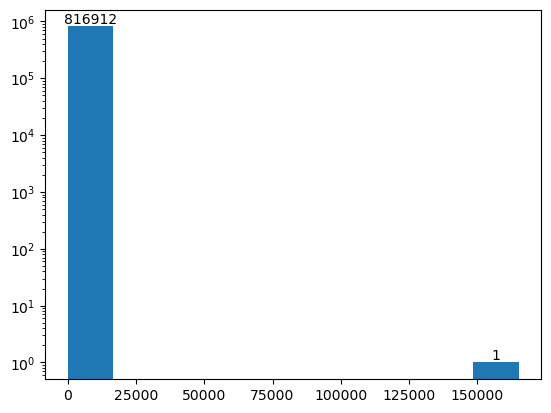

In [21]:
from matplotlib import pyplot as plt
_,_, bar = plt.hist(df['Sales Ratio'])    
plt.yscale('log')
plt.bar_label(bar)

[Text(0, 0, '120'),
 Text(0, 0, '2867'),
 Text(0, 0, '26706'),
 Text(0, 0, '102669'),
 Text(0, 0, '196402'),
 Text(0, 0, '203892'),
 Text(0, 0, '161202'),
 Text(0, 0, '74247'),
 Text(0, 0, '28565'),
 Text(0, 0, '10232')]

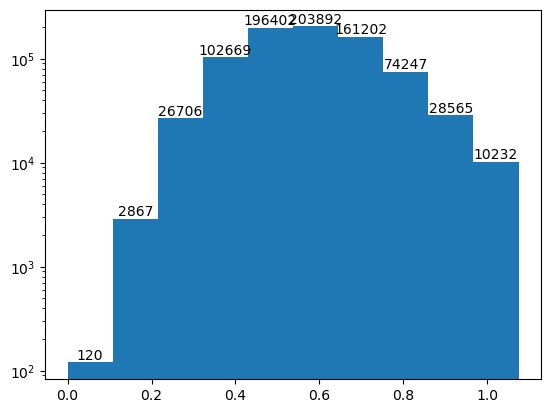

In [22]:
#for i in range(1000):
#    df = df[df['Sales Ratio'] != df['Sales Ratio'].max()]


threshold = df['Sales Ratio'].nlargest(10000).min()

df = df[df['Sales Ratio'] < threshold]

_,_, bar = plt.hist(df['Sales Ratio'])    
plt.yscale('log')
plt.bar_label(bar)

# Model Planning

In [23]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,Missing,Missing,Missing,POINT (-73.06822 41.35014),BEAVER ST
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,Missing,Missing,Missing,Missing,JACKSON ST
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Missing,Missing,Missing,Missing,Missing,WAKELEE AVE
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,Missing,Missing,Missing,Missing,PLATT ST
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,Missing,Missing,Missing,POINT (-72.879115982 41.773452988),BYRON DRIVE


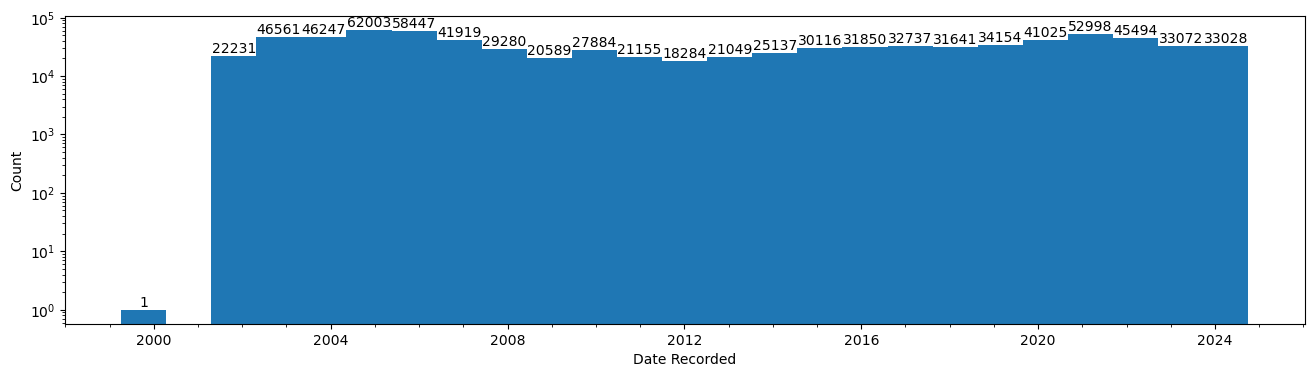

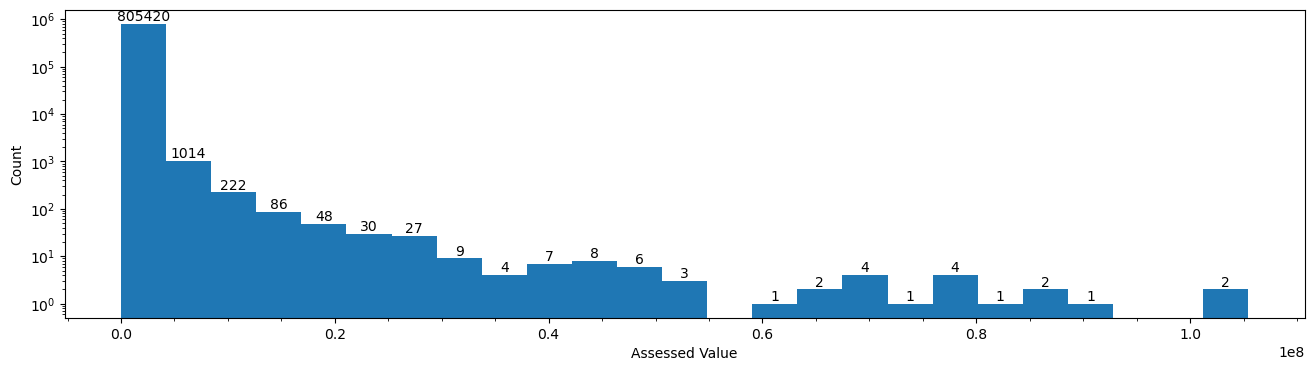

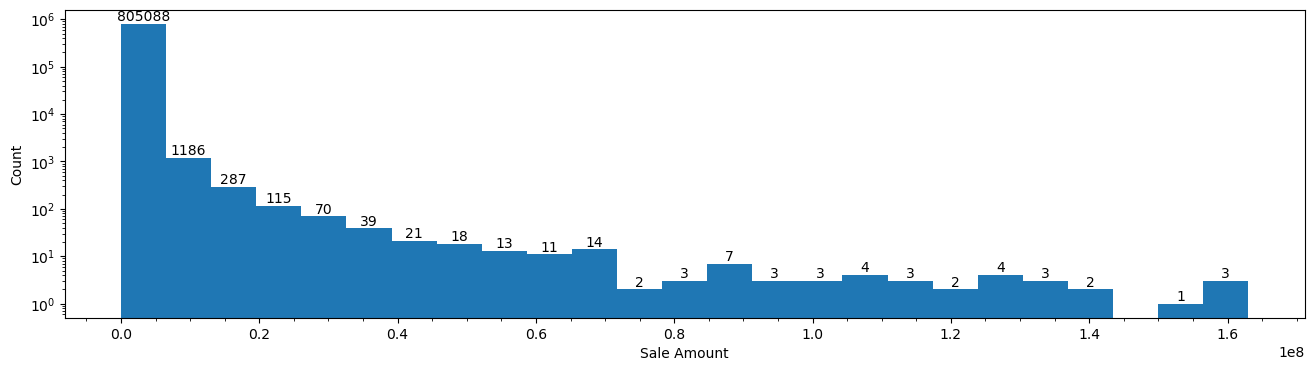

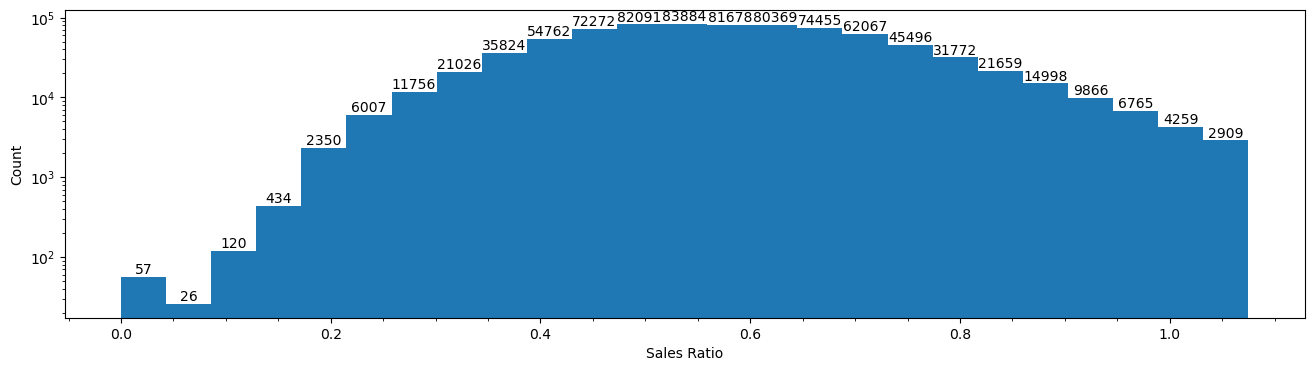

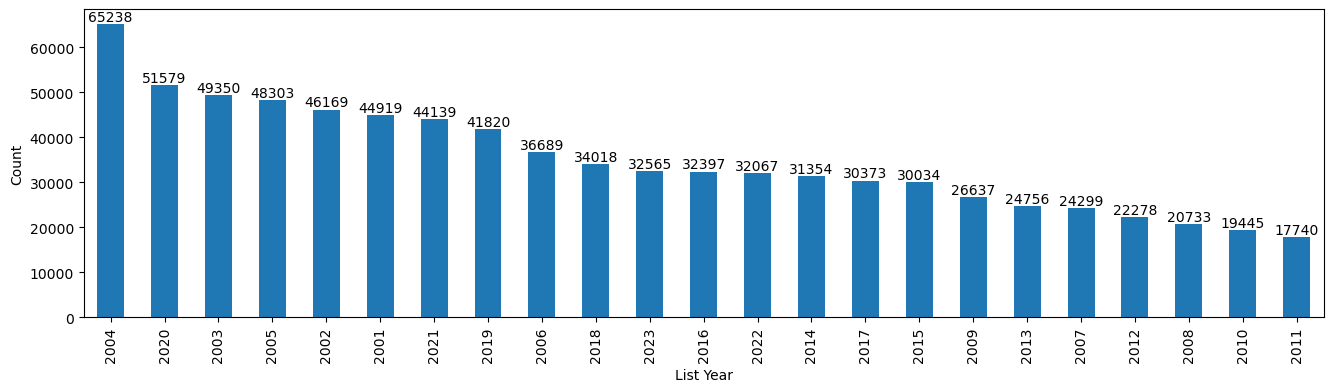

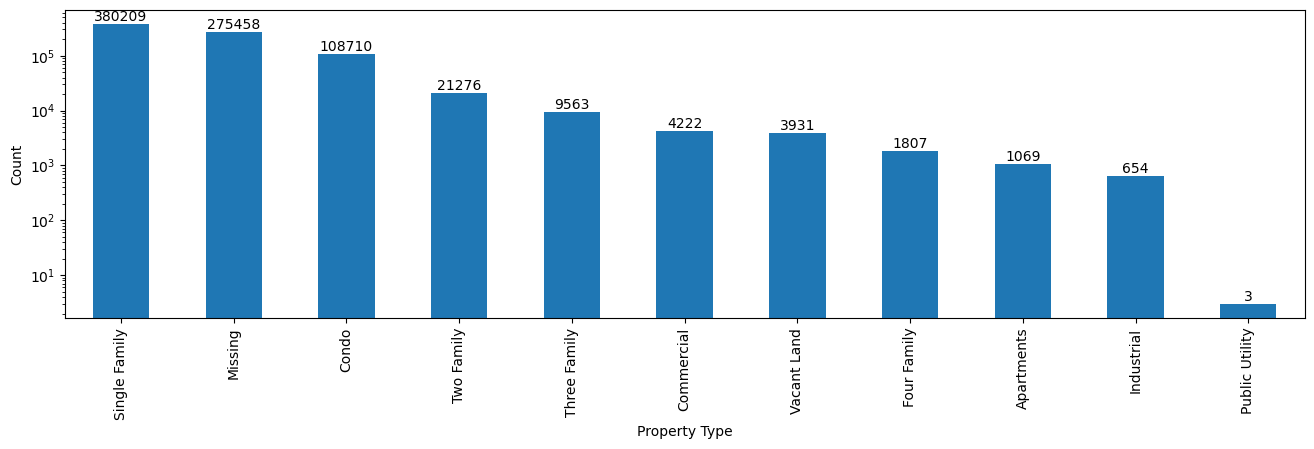

In [24]:
numeric_columns = [
    'Date Recorded',
    'Assessed Value',
    'Sale Amount',
    'Sales Ratio',
    
]
categoric_columns = [
    'List Year',
    'Property Type',
]

for col in numeric_columns:
    plt.figure(figsize=(16,4))
    _, _, bar = plt.hist(df[col], bins = 25)
    plt.bar_label(bar)
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.yscale('log')
    plt.minorticks_on()
    plt.show()
for col in categoric_columns:
    plt.figure(figsize=(16,4))
    if col == 'Property Type':
        plt.yscale('log')
    ax = df[col].value_counts().plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.show()

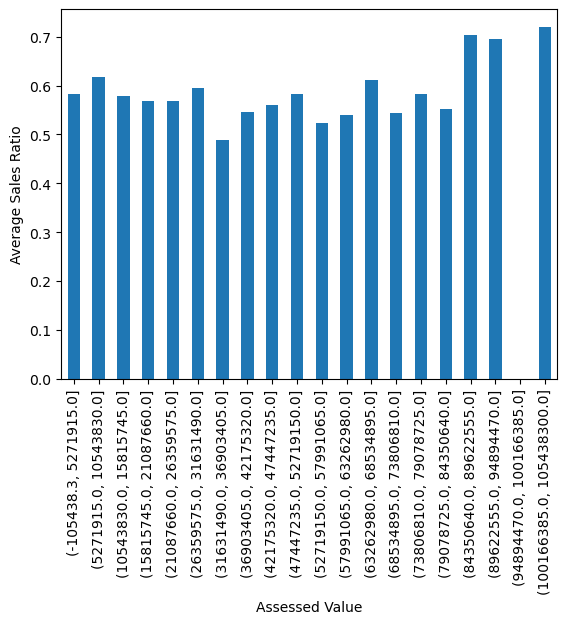

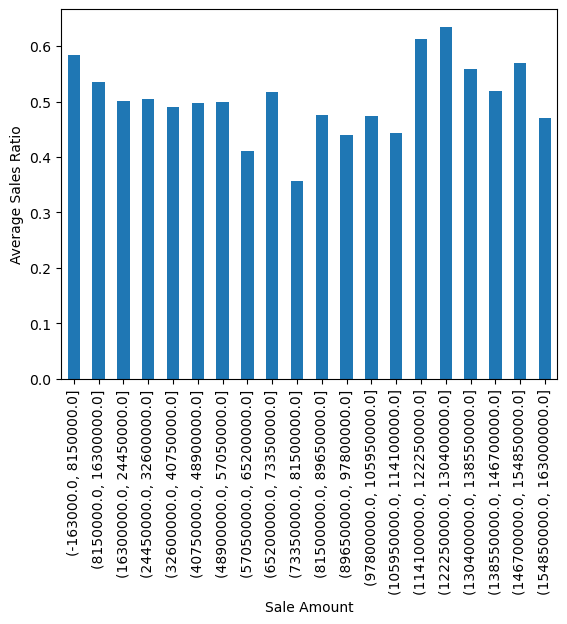

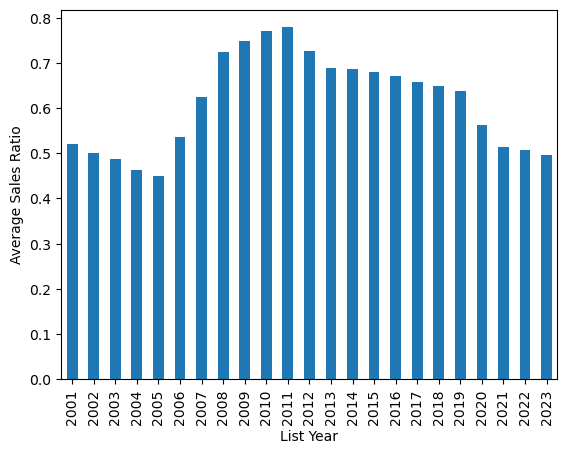

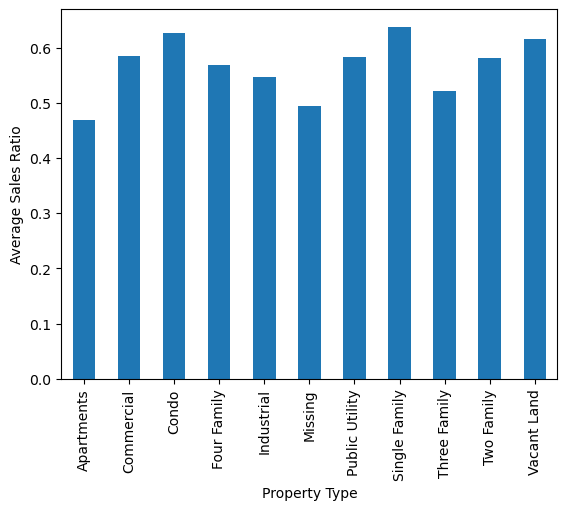

In [25]:
numeric_columns = ['Assessed Value','Sale Amount','Sales Ratio']

results = numeric_columns[2]

for col in numeric_columns:
    if col == results:
        continue
    df.groupby(pd.cut(df[col],bins = 20),observed=False)[results].mean().plot(kind = 'bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()

for col in categoric_columns:
    ax = df.groupby(col,observed=False)[results].mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()

In [26]:
df.nlargest(5, 'Sale Amount').sort_values(by = 'Sale Amount', ascending = False)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street
978518,1801122,2018,2019-06-04,Stamford,600 WASHINGTON BLVD,105438300.0,163000000.0,0.646800,Missing,Missing,Missing,Missing,Missing,Missing,WASHINGTON BLVD
936678,180898,2018,2019-09-04,Manchester,MUTLIPLE PROPERTIES,42485900.0,161238793.0,0.263400,Missing,Missing,Missing,"71,80,56,44HAYNES ST & 310,312,945-202,945-203...",Missing,Missing,MUTLIPLE PROPERTIES
1068780,220094,2022,2022-11-09,New Haven,360 STATE ST,80155110.0,160000000.0,0.500900,Commercial,Missing,Missing,Missing,Missing,POINT (-72.923262964 41.305365982),STATE ST
43477,2002096,2020,2021-07-12,Stamford,180 200 BROAD STREET,87850000.0,154000000.0,0.570400,Commercial,Missing,Missing,Missing,Missing,Missing,BROAD STREET
450456,60769,2006,2007-06-05,Greenwich,55 RAILROAD AVE,70057960.0,142500000.0,0.491635,Missing,Missing,Missing,Missing,Missing,Missing,RAILROAD AVE


In [27]:
df.nlargest(5, 'Sales Ratio').sort_values(by = 'Sales Ratio', ascending = False)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street
181850,10050,2001,2001-11-19,Plainville,53 WAYNE DR,76320.0,71000.0,1.074930,Missing,Missing,Missing,Missing,Missing,Missing,WAYNE DR
652571,11032,2011,2011-10-21,Fairfield,880 MILL HILL ROAD,1827350.0,1700000.0,1.074912,Single Family,Single Family,Missing,Missing,Missing,POINT (-73.28175 41.15129),MILL HILL ROAD
627356,110806,2011,2012-04-30,Bridgeport,462 WELLS STREET,155860.0,145000.0,1.074897,Single Family,Single Family,Missing,Missing,Missing,Missing,WELLS STREET
806876,150446,2015,2016-04-05,Meriden,28 CROWN VLG,28350.0,26375.0,1.074882,Condo,Condo,Missing,Missing,Missing,Missing,CROWN VLG
686497,120888,2012,2013-07-09,Norwalk,137 WASHINGTON ST A302,118230.0,110000.0,1.074818,Condo,Condo,Missing,Missing,Missing,Missing,WASHINGTON ST A


In [28]:
df.nsmallest(5, 'Sales Ratio').sort_values(by = 'Sales Ratio', ascending = True)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street
93856,210808,2021,2022-05-10,New Haven,190 WOOSTER ST UNIT 25,1.0,110000.0,0.0,Condo,Condo,Missing,co-op unit share sale,Missing,POINT (-72.919169996 41.301820018),WOOSTER ST UNIT
183600,20227,2002,2003-03-25,Bloomfield,58 KENMORE RD,0.0,327500.0,0.0,Missing,Missing,Missing,Missing,Missing,POINT (-72.77911 41.82015),KENMORE RD
186858,20051,2002,2002-11-01,Bloomfield,2 ASPEN CT,0.0,144500.0,0.0,Missing,Missing,Missing,Missing,Missing,Missing,ASPEN CT
186990,20071,2002,2002-10-17,Hartford,140 HARTLAND ST,0.0,86685.0,0.0,Missing,Missing,Missing,Missing,Missing,Missing,HARTLAND ST
189658,20070,2002,2002-10-11,Hartford,63 SEYMS ST,0.0,16000.0,0.0,Missing,Missing,Missing,Missing,Missing,POINT (-72.67939 41.77797),SEYMS ST


It seems that the properties with the lowest Sales ratios had an Assessed Value of 0.0. Since Sales Ratio = Assessed Value/Sale amount, the value of a sale with Assessed Value = 0.0 needs to be determined using sale amount

In [29]:
df[df['Assessed Value'] == 0.0].sort_values(by = 'Sale Amount', ascending = False).head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street
1104967,230887,2023,2024-06-14,Greenwich,ORCHARD STREET 0025 UN B,0.0,1795000.0,0.0,Condo,Condo,Missing,Missing,Missing,POINT (-73.59601 41.04169),ORCHARD STREET 0025 UN B
200638,20258,2002,2003-04-22,Bloomfield,12 AVERY RD,0.0,471000.0,0.0,Missing,Missing,Missing,Missing,Missing,POINT (-72.76093 41.80599),AVERY RD
183600,20227,2002,2003-03-25,Bloomfield,58 KENMORE RD,0.0,327500.0,0.0,Missing,Missing,Missing,Missing,Missing,POINT (-72.77911 41.82015),KENMORE RD
210610,20312,2002,2003-05-29,Bloomfield,7 BATH CRESCENT,0.0,325000.0,0.0,Missing,Missing,Missing,Missing,Missing,Missing,BATH CRESCENT
313875,30401,2003,2003-11-17,Stamford,48 STRAWBERRY HL AVE 3,0.0,295960.0,0.0,Missing,Missing,Missing,Missing,Missing,Missing,STRAWBERRY HL AVE


Do scaling here

# Model Building

## Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

classifiers = {
    'random_forest':GridSearchCV(
        RandomForestRegressor(
        verbose=1,
        n_jobs=-1,
        ),
        {
            'criterion':[
                'squared_error',
                #'absolute_error',
                'friedman_mse',
                'poisson'
            ],
        },
        n_jobs=-1,
        cv=2,
        verbose=1,
    ), #best so far
    'gradient_boost':GridSearchCV(
        GradientBoostingRegressor(
            #n_estimators=200,
            #learning_rate=0.05,
            max_depth=6,
            verbose=1,
        ),
        {
            'learning_rate':[0.01,0.1,0.3,0.5,0.7,0.9],
            'n_estimators':[10,50,100,200,300,400,500],
        },
        n_jobs=-1,
        cv=2,
        verbose=1,
    )
    
}
classifier = classifiers['gradient_boost']


column_trans = ColumnTransformer(
    transformers=[
        (
            'encode',
            OrdinalEncoder(
                handle_unknown="use_encoded_value",
                unknown_value=-1
            ),
            [
                'Property Type',
                'Town',
                'Street',
            ]            
        ),
        (
            'scale',
            StandardScaler(),
            [
                'Date Recorded',
                'List Year',
                'Assessed Value',
            ]
        ),
    ]
)

pipe = Pipeline(
    steps=[
        (
            'preprocess',
            column_trans,
        ),
        (
            'clf',
            classifier,
        ),
    ],  
)
model = pipe

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = df.drop(
    [
        'Serial Number',
        'Sales Ratio',
        'Sale Amount',
        'Address',
        'Location',
        'Non Use Code',
        'Residential Type',
        'Assessor Remarks',
        'OPM remarks'
    ],
    axis = 1,
)
X['Date Recorded'] = X['Date Recorded'].map(lambda x: x.toordinal())

y = df['Sales Ratio']
X.head()

,List Year,Date Recorded,Town,Assessed Value,Property Type,Street
0,2020,737894,Ansonia,133000.0,Single Family,BEAVER ST
1,2020,737936,Ansonia,110500.0,Three Family,JACKSON ST
2,2020,738046,Ansonia,150500.0,Commercial,WAKELEE AVE
3,2020,737773,Ansonia,127400.0,Two Family,PLATT ST
4,2021,738326,Avon,179990.0,Condo,BYRON DRIVE


In [32]:
y.head()

0    0.5354
1    0.4606
2    0.4630
3    0.6291
4    0.4965
Name: Sales Ratio, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.get_params()

Fitting 2 folds for each of 42 candidates, totalling 84 fits
      Iter       Train Loss   Remaining Time 
         1           0.0187            8.06m
         2           0.0158            8.29m
         3           0.0143            8.07m
         4           0.0135            8.03m
         5           0.0129            8.00m
         6           0.0126            7.97m
         7           0.0124            7.93m
         8           0.0122            7.92m
         9           0.0120            7.89m
        10           0.0119            7.87m
        20           0.0114            7.76m
        30           0.0111            7.63m
        40           0.0109            7.50m
        50           0.0108            7.35m
        60           0.0107            7.20m
        70           0.0105            7.04m
        80           0.0105            6.87m
        90           0.0104            6.70m
       100           0.0103            6.53m
       200           0.0098           

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(transformers=[('encode',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Property Type', 'Town', 'Street']),
                                   ('scale', StandardScaler(),
                                    ['Date Recorded', 'List Year',
                                     'Assessed Value'])])),
  ('clf',
   GridSearchCV(cv=2, estimator=GradientBoostingRegressor(max_depth=6, verbose=1),
                n_jobs=-1,
                param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
                            'n_estimators': [10, 50, 100, 200, 300, 400, 500]},
                verbose=1))],
 'transform_input': None,
 'verbose': False,
 'preprocess': ColumnTransformer(transformers=[('encode',
                                  OrdinalEncoder(handle_unknown='use_encoded_va

# Results

R²: 0.5540902252287515


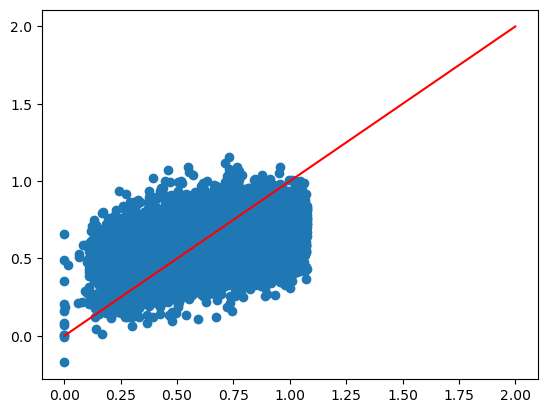

In [34]:
plt.scatter(y_test,y_pred)

x = np.linspace(0, 2, 100)
plt.plot(x, x, color='red')

r2 = model.score(X_test, y_test)
print("R²:", r2)